<center> <b>CREDIT RISK MODELING</b> </center>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import time

In [2]:
%matplotlib inline
#Opção 
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [22]:
df = pd.read_parquet("../../src/data/dataset_credit.parquet")

In [3]:
#df = pd.read_csv("dataset.csv", sep=";", encoding = 'latin_1') 

In [19]:
df.head(2)

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt
0,1,1,2500,2500,2500.0,36 months,13.56,84.92,C,Chef,10+ years,RENT,55000.0,Not Verified,Dec-18,Current,debt_consolidation,NY,18.24,0,Apr-01,1.0,9,1,4341,10.3,34,2386.02,167.02
1,2,2,30000,30000,30000.0,60 months,18.94,777.23,D,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-18,Current,debt_consolidation,LA,26.52,0,Jun-87,0.0,13,1,12315,24.2,44,29387.75,1507.11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 29 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           1048575 non-null  int64  
 1   id                   1048575 non-null  int64  
 2   loan_amnt            1048575 non-null  int64  
 3   funded_amnt          1048575 non-null  int64  
 4   funded_amnt_inv      1048575 non-null  float64
 5   term                 1048575 non-null  object 
 6   int_rate             1048575 non-null  float64
 7   installment          1048575 non-null  float64
 8   grade                1048575 non-null  object 
 9   emp_title            958131 non-null   object 
 10  emp_length           971110 non-null   object 
 11  home_ownership       1048575 non-null  object 
 12  annual_inc           1048575 non-null  float64
 13  verification_status  1048575 non-null  object 
 14  issue_d              1048575 non-null  object 
 15

<h2 style="color:red"><b> Sample  </b> </h2> 

In [6]:
df_sample=df.sample(n=10000, random_state=6)
df_sample.head(5)

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt
201099,201100,201100,7800,7800,7800.0,36 months,16.91,277.75,C,Field Director,3 years,RENT,75000.0,Source Verified,Aug-18,Current,credit_card,NE,17.02,1,Nov-02,1.0,6,0,12265,84.6,20,6756.84,1677.49000
621369,621370,621370,14400,14400,14400.0,36 months,11.99,478.22,C,Large Format Operator,1 year,OWN,50000.0,Source Verified,Jun-16,Fully Paid,debt_consolidation,TX,25.44,0,Aug-04,0.0,10,0,12506,85.7,15,0.00,16676.39676
111810,111811,111811,13000,13000,13000.0,36 months,6.11,396.14,A,AMO Cordinator/AMO Global Support,7 years,MORTGAGE,120000.0,Not Verified,Oct-18,Current,car,TX,13.27,0,Jun-03,0.0,17,0,16949,27.5,30,11670.09,1575.73000
591350,591351,591351,3000,3000,3000.0,36 months,13.49,101.80,C,General Manager,10+ years,MORTGAGE,45000.0,Not Verified,Jul-16,Current,home_improvement,AL,27.36,1,Sep-97,1.0,8,0,8632,49.6,19,491.91,3153.55000
770330,770331,770331,18000,18000,18000.0,60 months,18.99,466.84,D,Loan Originator,< 1 year,MORTGAGE,172000.0,Source Verified,Feb-16,Late (16-30 days),debt_consolidation,CA,10.58,1,Jul-88,3.0,14,1,10125,54.0,38,9887.06,15891.55000


In [7]:
#Describe without scientic notation 
pd.options.display.float_format = '{:,.10f}'.format
# To reset pd.reset_option('^display.', silent=True)
df_sample.describe()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt
count,"10,000.0000000000","10,000.0000000000","10,000.0000000000","10,000.0000000000","10,000.0000000000","10,000.0000000000","10,000.0000000000","10,000.0000000000","9,988.0000000000","10,000.0000000000","10,000.0000000000","10,000.0000000000","10,000.0000000000","10,000.0000000000","9,997.0000000000","10,000.0000000000","10,000.0000000000","10,000.0000000000"
mean,"523,427.7434000000","523,427.7434000000","15,446.4350000000","15,446.4350000000","15,441.5099653950",12.7463190000,454.2714910000,"79,239.8880580000",19.3900570685,0.2894000000,0.5163000000,11.7424000000,0.1912000000,"17,196.9015000000",47.4438331499,23.7863000000,"6,901.3253200000","9,465.3457062961"
std,"301,722.4094609142","301,722.4094609142","9,564.4559527736","9,564.4559527736","9,562.3083402366",4.9525777836,276.5246104277,"70,820.7732857440",14.3533903830,0.8591399491,0.8115418474,5.9264116019,0.5060317844,"25,953.0535889298",24.8281490253,12.1875791697,"9,015.1681838238","9,221.5912859587"
min,207.0000000000,207.0000000000,"1,000.0000000000","1,000.0000000000",975.0000000000,5.3100000000,30.1200000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,2.0000000000,0.0000000000,0.0000000000
25%,"261,754.2500000000","261,754.2500000000","8,000.0000000000","8,000.0000000000","8,000.0000000000",9.1600000000,251.0425000000,"48,000.0000000000",12.0600000000,0.0000000000,0.0000000000,8.0000000000,0.0000000000,"5,716.2500000000",28.4000000000,15.0000000000,0.0000000000,"2,629.7125000000"
50%,"519,696.5000000000","519,696.5000000000","13,500.0000000000","13,500.0000000000","13,500.0000000000",11.9900000000,382.9850000000,"66,000.0000000000",18.0900000000,0.0000000000,0.0000000000,11.0000000000,0.0000000000,"11,161.5000000000",46.2000000000,22.0000000000,"2,672.4700000000","6,175.3508015000"
75%,"786,244.5000000000","786,244.5000000000","20,000.0000000000","20,000.0000000000","20,000.0000000000",15.4100000000,609.0800000000,"95,000.0000000000",25.1125000000,0.0000000000,1.0000000000,15.0000000000,0.0000000000,"20,003.2500000000",66.0000000000,31.0000000000,"11,226.2975000000","13,382.5825000000"
max,"1,048,359.0000000000","1,048,359.0000000000","40,000.0000000000","40,000.0000000000","40,000.0000000000",30.9900000000,"1,486.3400000000","3,800,000.0000000000",690.1800000000,17.0000000000,5.0000000000,61.0000000000,7.0000000000,"587,934.0000000000",117.9000000000,111.0000000000,"39,136.9600000000","52,668.6176700000"


<p style="color:red"><b>Response variable</b> </p>


In [8]:
df_sample['loan_status'].value_counts() 

Current               5813
Fully Paid            3099
Charged Off            938
Late (31-120 days)      84
In Grace Period         48
Late (16-30 days)       18
Name: loan_status, dtype: int64

<b> Criteria for the Response variable: </b> 
<br><br>
<b> Good Client </b>:
<br>
Current
<br>
Fully Paid 
<br><br>
<b> Bad Client </b>:
<br>
Charged Off 
<br>
Default:failure to fulfil an obligation  
Late (31-120 days) 

<b> Delete </b>:
<br>
In Grace Period         
Late (16-30 days)       

In [9]:
# Primeira var
inicio = time.time()
conditions = [
    (df_sample['loan_status'].str.strip()  == "Current"),
    (df_sample['loan_status'].str.strip()  == "Fully Paid"),
    (df_sample['loan_status'].str.strip()  == "Charged Off"),
    (df_sample['loan_status'].str.strip()  == "Default"),
    (df_sample['loan_status'].str.strip()  == "Late (31-120 days)"),
    (df_sample['loan_status'].str.strip()  == "In Grace Period"),
    (df_sample['loan_status'].str.strip()  == "Late (16-30 days)")]
choices = [0,0,1,1,1,2,2]

df_sample['Default'] = np.select(conditions, choices, default='null')

fim = time.time()
print(fim - inicio)

0.022939205169677734


In [10]:
df_sample['Default'].value_counts() 

0    8912
1    1022
2      66
Name: Default, dtype: int64

In [11]:
# drop elements = 2 
df_sample=df_sample[df_sample['Default']!='2']   

In [12]:
df_sample['Default'].value_counts() 

0    8912
1    1022
Name: Default, dtype: int64

In [13]:
df_sample['Default'].describe()

count     9934
unique       2
top          0
freq      8912
Name: Default, dtype: object

In [14]:
#converte the Default variable from object to int
df_sample['Default']=df_sample['Default'].astype(int)

<center><h2 style="color:red"><b>Exploratory analysis</b> </h2> </center> 

<p style="color:red"><b>Missing value treatment</b> </p>

In [15]:
# Fuction that shows the missing variables and the percetage
def missing_value(df):
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("The dataframe have " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns with missing value.")
        
        return mis_val_table_ren_columns

In [16]:
missing_value(df_sample)

The dataframe have 30 columns.
There are 4 columns with missing value.


,Missing Values,% of Total Values
emp_title,820,8.3000000000
emp_length,695,7.0000000000
dti,12,0.1000000000
revol_util,3,0.0000000000


In [17]:
## Verificar se tem missing 
df_sample.isnull().sum() 

Unnamed: 0               0
id                       0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
term                     0
int_rate                 0
installment              0
grade                    0
emp_title              820
emp_length             695
home_ownership           0
annual_inc               0
verification_status      0
issue_d                  0
loan_status              0
purpose                  0
addr_state               0
dti                     12
delinq_2yrs              0
earliest_cr_line         0
inq_last_6mths           0
open_acc                 0
pub_rec                  0
revol_bal                0
revol_util               3
total_acc                0
out_prncp                0
total_pymnt              0
Default                  0
dtype: int64

We are going to use 3 kinds of data tretament: 
<br> 
1 Create a category to the missing value:   
As missing values are also a kind of information, we created a category missing to the variable emp_title and emp_length 
<br> 
2 Delete elements:   
we are going to delete the missing of the variable inq_last_6mths because the quantity is not relevant 
<br> 
3 Missing values imputing:   
dti revol_util 
<br> 



1) Create a category to the missing value:

In [18]:
df_sample['emp_length'].value_counts(dropna=False)

10+ years    3186
2 years       926
< 1 year      892
3 years       801
NaN           695
1 year        688
4 years       615
5 years       610
6 years       426
8 years       401
7 years       356
9 years       338
Name: emp_length, dtype: int64

In [19]:
df_sample['emp_length'].fillna(("missing"), inplace=True)

In [20]:
df_sample['emp_length'].value_counts(dropna=False)

10+ years    3186
2 years       926
< 1 year      892
3 years       801
missing       695
1 year        688
4 years       615
5 years       610
6 years       426
8 years       401
7 years       356
9 years       338
Name: emp_length, dtype: int64

In [21]:
df_sample['emp_title'].fillna(("missing"), inplace=True)

2) Delete elements

In [22]:
df_sample=df_sample[(df_sample['revol_util'].notnull())]

In [23]:
df_sample.describe()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,Default
count,"9,931.0000000000","9,931.0000000000","9,931.0000000000","9,931.0000000000","9,931.0000000000","9,931.0000000000","9,931.0000000000","9,931.0000000000","9,919.0000000000","9,931.0000000000","9,931.0000000000","9,931.0000000000","9,931.0000000000","9,931.0000000000","9,931.0000000000","9,931.0000000000","9,931.0000000000","9,931.0000000000","9,931.0000000000"
mean,"523,823.0147014399","523,823.0147014399","15,443.6058805760","15,443.6058805760","15,438.6743181905",12.7299607290,454.1343500151,"79,181.3182096465",19.3891491078,0.2895982278,0.5163629040,11.7508810794,0.1907159400,"17,173.2899003122",47.4274594703,23.8033430672,"6,876.0035474776","9,476.8547611480",0.1029100795
std,"302,092.8410571114","302,092.8410571114","9,565.3375225753","9,565.3375225753","9,563.1721058945",4.9450539307,276.4683989119,"70,635.8530008431",14.3658607418,0.8607542242,0.8119259009,5.9316659214,0.5062334512,"25,703.0804795574",24.8324727342,12.1920306835,"9,011.5888960051","9,229.6273559563",0.3038566967
min,207.0000000000,207.0000000000,"1,000.0000000000","1,000.0000000000",975.0000000000,5.3100000000,30.1200000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,2.0000000000,0.0000000000,0.0000000000,0.0000000000
25%,"261,428.5000000000","261,428.5000000000","8,000.0000000000","8,000.0000000000","8,000.0000000000",8.9900000000,250.6600000000,"48,000.0000000000",12.0700000000,0.0000000000,0.0000000000,8.0000000000,0.0000000000,"5,722.0000000000",28.4000000000,15.0000000000,0.0000000000,"2,629.1050000000",0.0000000000
50%,"521,044.0000000000","521,044.0000000000","13,475.0000000000","13,475.0000000000","13,450.0000000000",11.9900000000,382.7400000000,"66,000.0000000000",18.0900000000,0.0000000000,0.0000000000,11.0000000000,0.0000000000,"11,162.0000000000",46.2000000000,22.0000000000,"2,565.9300000000","6,188.2500000000",0.0000000000
75%,"787,198.0000000000","787,198.0000000000","20,000.0000000000","20,000.0000000000","20,000.0000000000",15.3100000000,609.0900000000,"94,848.0000000000",25.0950000000,0.0000000000,1.0000000000,15.0000000000,0.0000000000,"20,004.5000000000",66.0000000000,31.0000000000,"11,199.4750000000","13,397.4300000000",0.0000000000
max,"1,048,359.0000000000","1,048,359.0000000000","40,000.0000000000","40,000.0000000000","40,000.0000000000",30.9900000000,"1,486.3400000000","3,800,000.0000000000",690.1800000000,17.0000000000,5.0000000000,61.0000000000,7.0000000000,"587,934.0000000000",117.9000000000,111.0000000000,"39,136.9600000000","52,668.6176700000",1.0000000000


3) Missing values imputing:

In [24]:
df_sample['dti'].fillna((df_sample['dti'].mean()), inplace=True)

In [25]:
df_sample.isnull().sum() 

Unnamed: 0             0
id                     0
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
emp_title              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
out_prncp              0
total_pymnt            0
Default                0
dtype: int64

In [26]:
# As the variables loan_amnt, funded_amnt and funded_amnt_inv look like having the same information, we analise correlation between then
df_2=df_sample.iloc[:, 2:6]

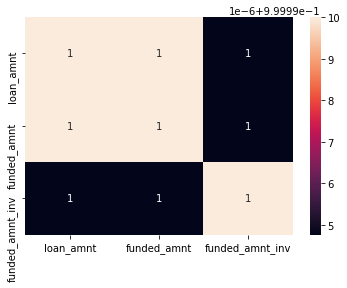

In [27]:
corrMatrix = df_2.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [28]:
# as the variables are correlated, we will keep just the variable funded_amnt  

We select the numeric variable to analyse separately

In [94]:
df_num = df_sample.loc[:,['funded_amnt','int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs','inq_last_6mths', 'open_acc', 
                  'revol_bal', 'revol_util','total_acc', 'out_prncp', 'total_pymnt', 'Default']]

Analyse of the correlation between the numerical independent variable 

In [95]:
corr = df_num.corr()
corr.style.background_gradient(cmap='coolwarm')

,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,Default
funded_amnt,1.000000,0.064804,0.944814,0.309590,0.049529,-0.026449,-0.020252,0.179482,0.319294,0.096081,0.197205,0.574518,0.538411,0.005167
int_rate,0.064804,1.000000,0.099267,-0.086346,0.122842,0.069465,0.170174,-0.023607,-0.035149,0.236871,-0.053349,0.034551,0.042184,0.178471
installment,0.944814,0.099267,1.000000,0.300542,0.047107,-0.009830,-0.000077,0.165419,0.310017,0.123084,0.174676,0.483416,0.558042,0.019668
annual_inc,0.309590,-0.086346,0.300542,1.000000,-0.147111,0.048163,0.036546,0.158001,0.335563,0.052334,0.191188,0.154021,0.194167,-0.028283
dti,0.049529,0.122842,0.047107,-0.147111,1.000000,-0.022194,-0.010249,0.187191,0.099358,0.127557,0.169175,0.076420,-0.016869,0.016142
delinq_2yrs,-0.026449,0.069465,-0.009830,0.048163,-0.022194,1.000000,0.027082,0.044270,-0.030826,0.025995,0.113825,-0.049577,0.028371,0.004247
inq_last_6mths,-0.020252,0.170174,-0.000077,0.036546,-0.010249,0.027082,1.000000,0.149288,-0.012173,-0.113362,0.164709,-0.079756,0.039437,0.105427
open_acc,0.179482,-0.023607,0.165419,0.158001,0.187191,0.044270,0.149288,1.000000,0.218612,-0.144236,0.732071,0.089057,0.109466,0.020316
revol_bal,0.319294,-0.035149,0.310017,0.335563,0.099358,-0.030826,-0.012173,0.218612,1.000000,0.256661,0.202005,0.158193,0.211954,-0.015498
revol_util,0.096081,0.236871,0.123084,0.052334,0.127557,0.025995,-0.113362,-0.144236,0.256661,1.000000,-0.102803,-0.007027,0.139804,0.050737


As installment and funded_amnt as strongly correlated, installment will be deleted

In [96]:
df_num.drop(['installment'], axis='columns', inplace=True)

<p style="color:red"><b> Outliers Treatement </b> </p>

In [97]:
len(df_num.columns)

13

funded_amnt          AxesSubplot(0.125,0.749828;0.227941x0.130172)
int_rate          AxesSubplot(0.398529,0.749828;0.227941x0.130172)
annual_inc        AxesSubplot(0.672059,0.749828;0.227941x0.130172)
dti                  AxesSubplot(0.125,0.593621;0.227941x0.130172)
delinq_2yrs       AxesSubplot(0.398529,0.593621;0.227941x0.130172)
inq_last_6mths    AxesSubplot(0.672059,0.593621;0.227941x0.130172)
open_acc             AxesSubplot(0.125,0.437414;0.227941x0.130172)
revol_bal         AxesSubplot(0.398529,0.437414;0.227941x0.130172)
revol_util        AxesSubplot(0.672059,0.437414;0.227941x0.130172)
total_acc            AxesSubplot(0.125,0.281207;0.227941x0.130172)
out_prncp         AxesSubplot(0.398529,0.281207;0.227941x0.130172)
total_pymnt       AxesSubplot(0.672059,0.281207;0.227941x0.130172)
Default                 AxesSubplot(0.125,0.125;0.227941x0.130172)
dtype: object

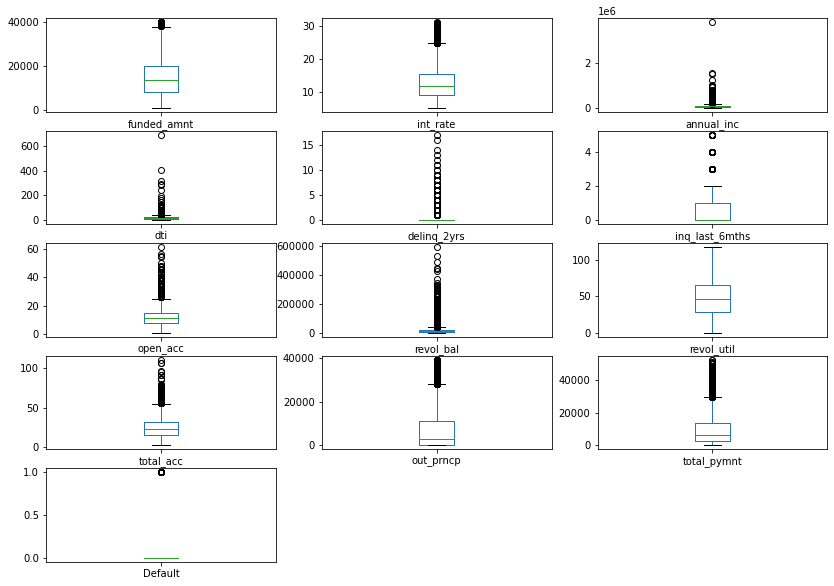

In [98]:
# 12 varibles -> 4x3
df_num.plot(kind= 'box' , subplots=True, layout=(5,3),figsize=(14,10))

### Replace with the mean

In [99]:
#fucntion that replace outlier by mean
def outlier_mean(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p
    return df

In [100]:
df_out_mean=outlier_mean(df_num)
df_out_mean.head(5)

,funded_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,Default
201099,"7,800.0000000000",16.9100000000,"75,000.0000000000",17.0200000000,0.0000000000,1.0000000000,6.0000000000,"12,265.0000000000",84.6000000000,20.0000000000,"6,756.8400000000","1,677.4900000000",0.0000000000
621369,"14,400.0000000000",11.9900000000,"50,000.0000000000",25.4400000000,0.0000000000,0.0000000000,10.0000000000,"12,506.0000000000",85.7000000000,15.0000000000,0.0000000000,"16,676.3967600000",0.0000000000
111810,"13,000.0000000000",6.1100000000,"120,000.0000000000",13.2700000000,0.0000000000,0.0000000000,17.0000000000,"16,949.0000000000",27.5000000000,30.0000000000,"11,670.0900000000","1,575.7300000000",0.0000000000
591350,"3,000.0000000000",13.4900000000,"45,000.0000000000",27.3600000000,0.0000000000,1.0000000000,8.0000000000,"8,632.0000000000",49.6000000000,19.0000000000,491.9100000000,"3,153.5500000000",0.0000000000
178479,"2,500.0000000000",7.2100000000,"110,000.0000000000",24.7100000000,0.0000000000,0.0000000000,13.0000000000,"22,042.0000000000",27.8000000000,35.0000000000,0.0000000000,"2,571.8166280000",0.0000000000


funded_amnt          AxesSubplot(0.125,0.749828;0.227941x0.130172)
int_rate          AxesSubplot(0.398529,0.749828;0.227941x0.130172)
annual_inc        AxesSubplot(0.672059,0.749828;0.227941x0.130172)
dti                  AxesSubplot(0.125,0.593621;0.227941x0.130172)
delinq_2yrs       AxesSubplot(0.398529,0.593621;0.227941x0.130172)
inq_last_6mths    AxesSubplot(0.672059,0.593621;0.227941x0.130172)
open_acc             AxesSubplot(0.125,0.437414;0.227941x0.130172)
revol_bal         AxesSubplot(0.398529,0.437414;0.227941x0.130172)
revol_util        AxesSubplot(0.672059,0.437414;0.227941x0.130172)
total_acc            AxesSubplot(0.125,0.281207;0.227941x0.130172)
out_prncp         AxesSubplot(0.398529,0.281207;0.227941x0.130172)
total_pymnt       AxesSubplot(0.672059,0.281207;0.227941x0.130172)
Default                 AxesSubplot(0.125,0.125;0.227941x0.130172)
dtype: object

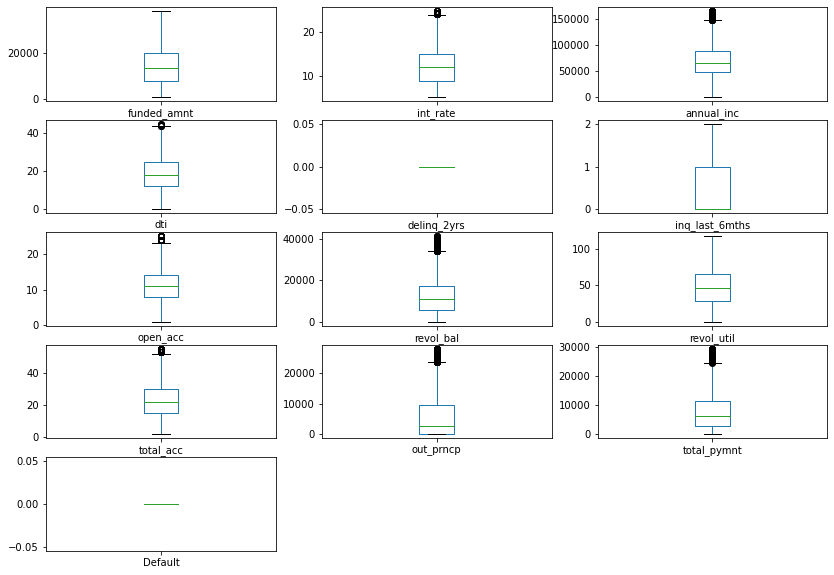

In [101]:
# 12 varibles -> 4x3
df_out_mean.plot(kind= 'box' , subplots=True, layout=(5,3),figsize=(14,10))

In [102]:
df_out_mean.head(5)

,funded_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,Default
201099,"7,800.0000000000",16.9100000000,"75,000.0000000000",17.0200000000,0.0000000000,1.0000000000,6.0000000000,"12,265.0000000000",84.6000000000,20.0000000000,"6,756.8400000000","1,677.4900000000",0.0000000000
621369,"14,400.0000000000",11.9900000000,"50,000.0000000000",25.4400000000,0.0000000000,0.0000000000,10.0000000000,"12,506.0000000000",85.7000000000,15.0000000000,0.0000000000,"16,676.3967600000",0.0000000000
111810,"13,000.0000000000",6.1100000000,"120,000.0000000000",13.2700000000,0.0000000000,0.0000000000,17.0000000000,"16,949.0000000000",27.5000000000,30.0000000000,"11,670.0900000000","1,575.7300000000",0.0000000000
591350,"3,000.0000000000",13.4900000000,"45,000.0000000000",27.3600000000,0.0000000000,1.0000000000,8.0000000000,"8,632.0000000000",49.6000000000,19.0000000000,491.9100000000,"3,153.5500000000",0.0000000000
178479,"2,500.0000000000",7.2100000000,"110,000.0000000000",24.7100000000,0.0000000000,0.0000000000,13.0000000000,"22,042.0000000000",27.8000000000,35.0000000000,0.0000000000,"2,571.8166280000",0.0000000000


# Categorical variable analysis
we let the variable Default to calculate the IV

In [38]:
df_cat = df_sample.loc[:,['term','grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'purpose',
                  'addr_state','earliest_cr_line','pub_rec', 'Default']]

In [39]:
# Calculate information value
def calc_iv(df, feature, target, pr=False):
    """
    Set pr=True to enable printing of output.
    
    Output: 
      * iv: float,
      * data: pandas.DataFrame
    """

    lst = []

    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())


    iv = data['IV'].sum()
    # print(iv)

    return iv, data

# 1 var - term

In [40]:
iv, data = calc_iv(df_cat, 'term', 'Default')
print('IV:', iv)
data

IV: 0.02125607214728259


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,term,36 months,7037,6375,662,0.7085892659,0.0940741793,0.7155685262,0.6477495108,0.0995733041,0.0067529635
1,term,60 months,2894,2534,360,0.2914107341,0.1243953006,0.2844314738,0.3522504892,-0.2138501805,0.0145031087


# 2 var pub_rec

In [41]:
df_cat['pub_rec'].value_counts()

0    8345
1    1399
2     114
3      44
4      17
5       8
7       3
6       1
Name: pub_rec, dtype: int64

In [42]:
# We create a group to the elementes greater than 2
pub_rec_clas = [
    (df_cat['pub_rec'] == 0),
    (df_cat['pub_rec'] == 1),
    (df_cat['pub_rec'] >= 2)]
choices = [0,1,2]

df_cat['pub_rec_2'] = np.select(pub_rec_clas, choices, default='null')

In [43]:
df_cat['pub_rec_2'].value_counts()

0    8345
1    1399
2     187
Name: pub_rec_2, dtype: int64

In [44]:
iv, data = calc_iv(df_cat, 'pub_rec_2', 'Default')
print('IV:', iv)
data

IV: 0.026673690959182456


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,pub_rec_2,0,8345,7538,807,0.8402980566,0.0967046135,0.8461106746,0.7896281800,0.0690879956,0.0039022623
1,pub_rec_2,1,1399,1220,179,0.1408720169,0.1279485347,0.1369401729,0.1751467710,-0.2460801781,0.0094018865
2,pub_rec_2,2,187,151,36,0.0188299265,0.1925133690,0.0169491525,0.0352250489,-0.7315396116,0.0133695421


# 3 Var  grade

In [45]:
print( df_cat['grade'].value_counts(), '\n Percent \n ', df_cat['grade'].value_counts(normalize=True))

B    2952
C    2793
A    2208
D    1314
E     495
F     139
G      30
Name: grade, dtype: int64 
 Percent 
  B   0.2972510321
C   0.2812405599
A   0.2223341053
D   0.1323129594
E   0.0498439231
F   0.0139965764
G   0.0030208438
Name: grade, dtype: float64


In [46]:
iv, data = calc_iv(df_cat, 'grade', 'Default')
print('IV:', iv)
data

IV: 0.5077790568192316


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,grade,A,2208,2150,58,0.2223341053,0.0262681159,0.2413289932,0.0567514677,1.4474796006,0.2671722028
1,grade,B,2952,2725,227,0.2972510321,0.0768970190,0.3058704681,0.2221135029,0.3199731797,0.0267999825
2,grade,C,2793,2456,337,0.2812405599,0.1206587898,0.2756762824,0.3297455969,-0.1790941510,0.0096834980
3,grade,D,1314,1094,220,0.1323129594,0.1674277017,0.1227971714,0.2152641879,-0.5613320733,0.0519047021
4,grade,E,495,377,118,0.0498439231,0.2383838384,0.0423167583,0.1154598826,-1.0037399470,0.0734166757
5,grade,F,139,88,51,0.0139965764,0.3669064748,0.0098776518,0.0499021526,-1.6197893282,0.0648312593
6,grade,G,30,19,11,0.0030208438,0.3666666667,0.0021326748,0.0107632094,-1.6187568036,0.0139707366


# 4 var  purpose

In [47]:
df_cat['purpose'].value_counts()

debt_consolidation    5346
credit_card           2497
home_improvement       692
other                  646
major_purchase         215
small_business         114
medical                108
car                    106
moving                  73
vacation                70
house                   54
renewable_energy        10
Name: purpose, dtype: int64

In [48]:
iv, data = calc_iv(df_cat, 'purpose', 'Default')
print('IV:', iv)
data

IV: 0.059110610816684596


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,purpose,car,106,96,10,0.0106736482,0.0943396226,0.0107756202,0.0097847358,0.0964625885,0.0000955833
1,purpose,credit_card,2497,2319,178,0.2514349008,0.0712855427,0.2602985745,0.1741682975,0.4018072770,0.0346077721
2,purpose,debt_consolidation,5346,4724,622,0.5383143691,0.1163486719,0.5302503087,0.6086105675,-0.1378294254,0.0108003494
3,purpose,home_improvement,692,623,69,0.0696807975,0.0997109827,0.0699292850,0.0675146771,0.0351395042,0.0000848481
4,purpose,house,54,48,6,0.0054375189,0.1111111111,0.0053878101,0.0058708415,-0.0858589683,0.0000414726
5,purpose,major_purchase,215,201,14,0.0216493807,0.0651162791,0.0225614547,0.0136986301,0.4989470685,0.0044220803
6,purpose,medical,108,91,17,0.0108750378,0.1574074074,0.0102143899,0.0166340509,-0.4876543475,0.0031305756
7,purpose,moving,73,65,8,0.0073507200,0.1095890411,0.0072959928,0.0078277886,-0.0703547817,0.0000374144
8,purpose,other,646,573,73,0.0650488370,0.1130030960,0.0643169828,0.0714285714,-0.1048742344,0.0007458224
9,purpose,renewable_energy,10,8,2,0.0010069479,0.2000000000,0.0008979683,0.0019569472,-0.7790061488,0.0008249510


In [49]:
# We create groups acoording to the features extracted by IV. Ex, house and Car have similar IV, them they are in the same group
purpose_clas = [
    (df_cat['purpose'].str.strip()  == "debt_consolidation"), 
    (df_cat['purpose'].str.strip()  == "car"),
    (df_cat['purpose'].str.strip()  == "house"), 
    (df_cat['purpose'].str.strip()  == "renewable_energy"),
    (df_cat['purpose'].str.strip()  == "credit_card")]
choices = [0,0,0,0,1]

df_cat['purpose_2'] = np.select(purpose_clas, choices, default=2)

In [50]:
df_cat['purpose_2'].value_counts()

0    5516
1    2497
2    1918
Name: purpose_2, dtype: int64

In [51]:
iv, data = calc_iv(df_cat, 'purpose_2', 'Default')
print('IV:', iv)
data

IV: 0.04550211492416163


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,purpose_2,0,5516,4876,640,0.5554324841,0.1160261059,0.5473117073,0.6262230920,-0.1346881957,0.0106284320
1,purpose_2,1,2497,2319,178,0.2514349008,0.0712855427,0.2602985745,0.1741682975,0.4018072770,0.0346077721
2,purpose_2,2,1918,1714,204,0.1931326150,0.1063607925,0.1923897183,0.1996086106,-0.0368354046,0.0002659108


# 5 var home_ownership

In [52]:
df_cat['home_ownership'].value_counts() 

MORTGAGE    4831
RENT        3893
OWN         1203
ANY            4
Name: home_ownership, dtype: int64

In [53]:
iv, data = calc_iv(df_cat, 'home_ownership', 'Default')
print('IV:', iv)
data

IV: 0.032774950181218475


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,home_ownership,ANY,4,4,0,0.0004027792,0.0000000000,0.0004489842,0.0000000000,0.0000000000,0.0000000000
1,home_ownership,MORTGAGE,4831,4415,416,0.4864565502,0.0861105361,0.4955662813,0.4070450098,0.1967773428,0.0174189806
2,home_ownership,OWN,1203,1069,134,0.1211358373,0.1113881962,0.1199910203,0.1311154599,-0.0886613989,0.0009863084
3,home_ownership,RENT,3893,3421,472,0.3920048334,0.1212432571,0.3839937142,0.4618395303,-0.1845913106,0.0143696612


# 6 var verification_status

In [54]:
df_cat['verification_status'].value_counts() 

Source Verified    4099
Not Verified       3348
Verified           2484
Name: verification_status, dtype: int64

In [55]:
iv, data = calc_iv(df_cat, 'verification_status', 'Default')
print('IV:', iv)
data

IV: 0.1403500163740635


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,verification_status,Not Verified,3348,3142,206,0.3371261706,0.0615292712,0.3526770681,0.2015655577,0.5594381401,0.0845375423
1,verification_status,Source Verified,4099,3655,444,0.4127479609,0.1083191022,0.4102592884,0.4344422701,-0.0572737002,0.0013850488
2,verification_status,Verified,2484,2112,372,0.2501258685,0.1497584541,0.2370636435,0.3639921722,-0.4288037194,0.0544274252


# 7 var emp_length

In [56]:
df_cat['emp_length'].value_counts() 

10+ years    3186
2 years       925
< 1 year      892
3 years       801
missing       695
1 year        688
4 years       614
5 years       610
6 years       425
8 years       401
7 years       356
9 years       338
Name: emp_length, dtype: int64

In [57]:
iv, data = calc_iv(df_cat, 'emp_length', 'Default')
print('IV:', iv)
data

IV: 0.026380043250144015


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,emp_length,1 year,688,609,79,0.0692780183,0.1148255814,0.0683578404,0.0772994129,-0.1229300947,0.0010991884
1,emp_length,10+ years,3186,2893,293,0.3208136139,0.0919648462,0.3247278033,0.2866927593,0.1245761860,0.0047382607
2,emp_length,2 years,925,850,75,0.0931426845,0.0810810811,0.0954091368,0.0733855186,0.2624477260,0.0057800485
3,emp_length,3 years,801,710,91,0.0806565301,0.1136079900,0.0796946908,0.0890410959,-0.1108950464,0.0010364700
4,emp_length,4 years,614,557,57,0.0618266036,0.0928338762,0.0625210461,0.0557729941,0.1142134621,0.0007707184
5,emp_length,5 years,610,543,67,0.0614238244,0.1098360656,0.0609496015,0.0655577299,-0.0728838094,0.0003358580
6,emp_length,6 years,425,388,37,0.0427952875,0.0870588235,0.0435514648,0.0362035225,0.1847869170,0.0013578036
7,emp_length,7 years,356,317,39,0.0358473467,0.1095505618,0.0355819957,0.0381604697,-0.0699603822,0.0001803910
8,emp_length,8 years,401,348,53,0.0403786124,0.1321695761,0.0390616231,0.0518590998,-0.2833899437,0.0036266762
9,emp_length,9 years,338,300,38,0.0340348404,0.1124260355,0.0336738130,0.0371819961,-0.0991041950,0.0003476757


In [58]:
# We create groups acoording to the features extracted by IV.
purpose_clas = [
    (df_cat['emp_length'].str.strip()  == "5 years"), 
    (df_cat['emp_length'].str.strip()  == "6 years"),
    (df_cat['emp_length'].str.strip()  == "missing"), 
    (df_cat['emp_length'].str.strip()  == "10+ years"),
    (df_cat['emp_length'].str.strip()  == "< 1 year")]
choices = [0,0,1,1,1]

df_cat['emp_length_2'] = np.select(purpose_clas, choices, default=2)

In [59]:
iv, data = calc_iv(df_cat, 'emp_length_2', 'Default')
print('IV:', iv)
data

IV: 0.0003084004754408373


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,emp_length_2,0,1035,931,104,0.1042191119,0.1004830918,0.1045010663,0.1017612524,0.0265678682,0.0000727910
1,emp_length_2,1,4773,4287,486,0.4806162521,0.1018227530,0.4811987877,0.4755381605,0.0118333327,0.0000669841
2,emp_length_2,2,4123,3691,432,0.4151646360,0.1047780742,0.4143001459,0.4227005871,-0.0200733952,0.0001686254


# 8 var emp_title

In [60]:
print( df_cat['emp_title'].value_counts(), '\n Percent \n ', df_cat['emp_title'].value_counts(normalize=True))

missing                                820
Teacher                                176
Manager                                162
Owner                                  106
Driver                                  88
                                      ... 
Presser/packer                           1
junior chemist                           1
Vice President-Sr. Client Associate      1
Night Auditor                            1
Lot tech                                 1
Name: emp_title, Length: 5356, dtype: int64 
 Percent 
  missing                               0.0825697311
Teacher                               0.0177222838
Manager                               0.0163125566
Owner                                 0.0106736482
Driver                                0.0088611419
                                          ...     
Presser/packer                        0.0001006948
junior chemist                        0.0001006948
Vice President-Sr. Client Associate   0.0001006948
Night Audit

In [61]:
#count the number of categories
len(set(df_cat['emp_title']))

5356

In [62]:
# We create groups acoording to the features extracted by IV.
purpose_clas = [
    (df_cat['emp_title'].str.strip()  == "missing"), 
    (df_cat['emp_title'].str.strip()  == "Teacher"),
    (df_cat['emp_title'].str.strip()  == "missing"), 
    (df_cat['emp_title'].str.strip()  == "Manager"),
    (df_cat['emp_title'].str.strip()  == "Owner")]
choices = [0,1,2,3,4]

df_cat['emp_title_2'] = np.select(purpose_clas, choices, default=5)

In [63]:
iv, data = calc_iv(df_cat, 'emp_title_2', 'Default')
print('IV:', iv)
data

IV: 0.0032424023092608857


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,emp_title_2,0,820,723,97,0.0825697311,0.1182926829,0.0811538893,0.0949119374,-0.1566022663,0.0021545415
1,emp_title_2,1,193,175,18,0.0194340953,0.0932642487,0.0196430576,0.0176125245,0.1091137061,0.0002215590
2,emp_title_2,3,174,153,21,0.0175208942,0.1206896552,0.0171736446,0.0205479452,-0.1793850263,0.0006052990
3,emp_title_2,4,118,106,12,0.0118819857,0.1016949153,0.0118980806,0.0117416830,0.0132319344,0.0000020694
4,emp_title_2,5,8626,7752,874,0.8685932937,0.1013215859,0.8701313279,0.8551859100,0.0173252680,0.0002589334


# 9 var addr_state

In [64]:
df_cat['addr_state'].value_counts() 

CA    1347
TX     846
NY     759
FL     739
IL     448
NJ     371
OH     354
GA     353
PA     319
VA     278
NC     264
MI     254
MD     231
MA     229
AZ     223
CO     214
MN     182
WA     180
IN     175
TN     173
MO     153
NV     140
CT     139
WI     129
AL     121
OR     120
SC     119
LA     117
KY      83
AR      80
OK      78
KS      76
MS      69
NM      58
UT      56
HI      48
NE      45
NH      43
RI      36
WY      30
WV      29
ID      28
ND      28
DE      27
ME      27
MT      26
VT      26
DC      25
AK      21
SD      15
Name: addr_state, dtype: int64

In [65]:
iv, data = calc_iv(df_cat, 'addr_state', 'Default')
print('IV:', iv)
data

IV: 0.04413778933632769


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,addr_state,AK,21,16,5,0.0021145907,0.2380952381,0.0017959367,0.0048923679,-1.0021497002,0.0031030876
1,addr_state,AL,121,111,10,0.0121840701,0.0826446281,0.0124593108,0.0097847358,0.2416445984,0.0006462966
2,addr_state,AR,80,68,12,0.0080555835,0.1500000000,0.0076327309,0.0117416830,-0.4306994546,0.0017697234
3,addr_state,AZ,223,199,24,0.0224549391,0.1076233184,0.0223369626,0.0234833659,-0.0500495156,0.0000573769
4,addr_state,CA,1347,1200,147,0.1356358876,0.1091314031,0.1346952520,0.1438356164,-0.0656562610,0.0006001222
5,addr_state,CO,214,197,17,0.0215486859,0.0794392523,0.0221124705,0.0166340509,0.2846898747,0.0015596506
6,addr_state,CT,139,127,12,0.0139965764,0.0863309353,0.0142552475,0.0117416830,0.1939799267,0.0004875811
7,addr_state,DC,25,25,0,0.0025173699,0.0000000000,0.0028061511,0.0000000000,0.0000000000,0.0000000000
8,addr_state,DE,27,24,3,0.0027187594,0.1111111111,0.0026939050,0.0029354207,-0.0858589683,0.0000207363
9,addr_state,FL,739,663,76,0.0744134528,0.1028416779,0.0744191267,0.0743639922,0.0007411399,0.0000000409


# 10 Var  issue_d

In [66]:
df_cat['issue_d'].value_counts() 

Mar-16    607
Aug-18    471
May-18    453
Oct-18    449
Dec-15    448
Apr-18    435
Jul-18    408
Jun-18    394
Mar-18    392
Feb-16    392
Dec-18    372
Nov-18    368
Sep-18    360
Nov-15    347
Dec-16    345
Apr-16    335
Nov-16    333
Aug-16    330
Oct-15    328
Jul-16    322
Feb-18    321
Jan-18    312
Oct-16    309
Jan-16    301
Jun-16    289
May-16    258
Sep-16    252
Name: issue_d, dtype: int64

In [67]:
iv, data = calc_iv(df_cat, 'issue_d', 'Default')
print('IV:', iv)
data

IV: 1.0966251333632187


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,issue_d,Apr-16,335,279,56,0.0337327560,0.1671641791,0.0313166461,0.0547945205,-0.5594404189,0.0131344719
1,issue_d,Apr-18,435,412,23,0.0438022354,0.0528735632,0.0462453699,0.0225048924,0.7202286235,0.0170985714
2,issue_d,Aug-16,330,269,61,0.0332292820,0.1848484848,0.0301941857,0.0596868885,-0.6814629945,0.0200981856
3,issue_d,Aug-18,471,469,2,0.0474272480,0.0042462845,0.0526433943,0.0019569472,3.2921550779,0.1668676444
4,issue_d,Dec-15,448,343,105,0.0451112677,0.2343750000,0.0385003929,0.1027397260,-0.9815304129,0.0630528592
5,issue_d,Dec-16,345,295,50,0.0347397040,0.1449275362,0.0331125828,0.0489236791,-0.3903481590,0.0061718323
6,issue_d,Dec-18,372,371,1,0.0374584634,0.0026881720,0.0416432821,0.0009784736,3.7509015527,0.1525296933
7,issue_d,Feb-16,392,321,71,0.0394723593,0.1811224490,0.0360309799,0.0694716243,-0.6565392639,0.0219550960
8,issue_d,Feb-18,321,307,14,0.0323230289,0.0436137072,0.0344595353,0.0136986301,0.9224899080,0.0191517255
9,issue_d,Jan-16,301,255,46,0.0303091330,0.1528239203,0.0286227410,0.0450097847,-0.4526783613,0.0074180601


In [68]:
# We create groups acoording to the features extracted by IV.
purpose_clas = [
    (df_cat['issue_d'].str.strip()  == "Aug-18"), 
    (df_cat['issue_d'].str.strip()  == "Sep-18"),
    (df_cat['issue_d'].str.strip()  == "Oct-18"), 
    (df_cat['issue_d'].str.strip()  == "Nov-18"),
    
    (df_cat['issue_d'].str.strip()  == "Apr-16"), 
    (df_cat['issue_d'].str.strip()  == "May-18"),
    (df_cat['issue_d'].str.strip()  == "Dec-15"), 
    (df_cat['issue_d'].str.strip()  == "Jun-18"),
    (df_cat['issue_d'].str.strip()  == "Jul-18"),       
    
    (df_cat['issue_d'].str.strip()  == "Apr-18"), 
    (df_cat['issue_d'].str.strip()  == "Feb-16"),
    (df_cat['issue_d'].str.strip()  == "Mar-16"), 
    (df_cat['issue_d'].str.strip()  == "Aug-16"),
    (df_cat['issue_d'].str.strip()  == "Jan-16")] 
choices = [0,0,0,0,1,1,1,1,1,2,2,2,2,2]

df_cat['issue_d_2'] = np.select(purpose_clas, choices, default=3)

In [69]:
df_cat.groupby(['issue_d', 'issue_d_2']).agg({'Default': ['count', 'min', 'max']})

Default        
                    count min max
issue_d issue_d_2                
Apr-16  1             335   0   1
Apr-18  2             435   0   1
Aug-16  2             330   0   1
Aug-18  0             471   0   1
Dec-15  1             448   0   1
Dec-16  3             345   0   1
Dec-18  3             372   0   1
Feb-16  2             392   0   1
Feb-18  3             321   0   1
Jan-16  2             301   0   1
Jan-18  3             312   0   1
Jul-16  3             322   0   1
Jul-18  1             408   0   1
Jun-16  3             289   0   1
Jun-18  1             394   0   1
Mar-16  2             607   0   1
Mar-18  3             392   0   1
May-16  3             258   0   1
May-18  1             453   0   1
Nov-15  3             347   0   1
Nov-16  3             333   0   1
Nov-18  0             368   0   1
Oct-15  3             328   0   1
Oct-16  3             309   0   1
Oct-18  0             449   0   1
Sep-16  3             252   0   1
Sep-18  0             360   0   1

In [70]:
iv, data = calc_iv(df_cat, 'issue_d_2', 'Default')
print('IV:', iv)
data

IV: 0.5109521129639508


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,issue_d_2,0,1648,1635,13,0.1659450206,0.0078883495,0.1835222808,0.0127201566,2.6691482159,0.4558961853
1,issue_d_2,1,2038,1840,198,0.2052159903,0.0971540726,0.2065327197,0.1937377691,0.0639533100,0.0008182794
2,issue_d_2,2,2065,1766,299,0.2079347498,0.1447941889,0.1982265125,0.2925636008,-0.3892717022,0.0367227589
3,issue_d_2,3,4180,3668,512,0.4209042393,0.1224880383,0.4117184869,0.5009784736,-0.1962233016,0.0175148893


# 11 earliest_cr_line

In [71]:
df_cat['earliest_cr_line'].value_counts() 

Sep-03    80
Sep-04    78
Aug-02    75
Sep-02    73
Aug-04    71
          ..
Sep-71     1
Jul-73     1
Jun-77     1
Aug-69     1
Sep-73     1
Name: earliest_cr_line, Length: 530, dtype: int64

In [72]:
#count the number of categories
len(set(df_cat['earliest_cr_line']))

530

In [73]:
# As we have a lot of categories, we create a variable "time" that is 01jan2020 - earliest_cr_line

treatement to transforme the var earliest_cr_line into datetime

In [74]:
# Extracte the month
df_cat['earliest_cr_line'].str.slice(0, 3).value_counts() 

Aug    1055
Sep     972
Oct     902
Nov     841
May     802
Mar     795
Jul     791
Dec     789
Jun     781
Apr     757
Feb     741
Jan     705
Name: earliest_cr_line, dtype: int64

Create the var Month 

In [75]:
#  
df_cat['earliest_cr_line_month']=df_cat['earliest_cr_line'].str.slice(0, 3).str.strip()

In [76]:
# We create groups acoording to the features extracted by IV.
conditions  = [
    (df_cat['earliest_cr_line_month'] == "Jan"), 
    (df_cat['earliest_cr_line_month'] == "Feb"),
    (df_cat['earliest_cr_line_month'] == "Mar"), 
    (df_cat['earliest_cr_line_month'] == "Apr"),
    (df_cat['earliest_cr_line_month'] == "May"), 
    (df_cat['earliest_cr_line_month'] == "Jun"),
    (df_cat['earliest_cr_line_month'] == "Jul"), 
    (df_cat['earliest_cr_line_month'] == "Aug"),
    (df_cat['earliest_cr_line_month'] == "Sep"),       
    (df_cat['earliest_cr_line_month'] == "Oct"), 
    (df_cat['earliest_cr_line_month'] == "Nov"),
    (df_cat['earliest_cr_line_month'] == "Dec")] 
choices = [1,2,3,4,5,6,7,8,9,10,11,12]

df_cat['earliest_cr_line_month1'] = np.select(conditions , choices, default=13)

In [77]:
df_cat.head(5)

,term,grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,addr_state,earliest_cr_line,pub_rec,Default,pub_rec_2,purpose_2,emp_length_2,emp_title_2,issue_d_2,earliest_cr_line_month,earliest_cr_line_month1
201099,36 months,C,Field Director,3 years,RENT,Source Verified,Aug-18,credit_card,NE,Nov-02,0,0,0,1,2,5,0,Nov,11
621369,36 months,C,Large Format Operator,1 year,OWN,Source Verified,Jun-16,debt_consolidation,TX,Aug-04,0,0,0,0,2,5,3,Aug,8
111810,36 months,A,AMO Cordinator/AMO Global Support,7 years,MORTGAGE,Not Verified,Oct-18,car,TX,Jun-03,0,0,0,0,2,5,0,Jun,6
591350,36 months,C,General Manager,10+ years,MORTGAGE,Not Verified,Jul-16,home_improvement,AL,Sep-97,0,0,0,2,1,5,3,Sep,9
178479,36 months,A,Market Development Manager,5 years,RENT,Not Verified,Aug-18,major_purchase,NC,May-84,0,0,0,2,0,5,0,May,5


In [78]:
# year
df_cat['earliest_cr_line'].str.slice(4, 6).value_counts() 

05    684
03    664
04    630
02    620
06    620
01    545
07    503
00    503
99    455
96    365
98    349
08    336
97    314
94    265
95    263
93    230
11    217
10    210
09    205
12    204
90    151
92    137
13    136
91    132
89    124
88    124
14    114
87    112
86    107
84     93
85     73
82     62
15     59
83     58
81     48
80     35
78     34
77     28
79     28
76     20
75     16
73     10
74     10
71      6
72      6
70      5
66      4
65      4
67      3
64      3
68      3
69      2
63      1
62      1
Name: earliest_cr_line, dtype: int64

In [79]:
df_cat['earliest_cr_line_year']=df_cat['earliest_cr_line'].str.slice(4, 6)
df_cat['earliest_cr_line_day']=1

In [80]:
df_cat.head(5)

,term,grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,addr_state,earliest_cr_line,pub_rec,Default,pub_rec_2,purpose_2,emp_length_2,emp_title_2,issue_d_2,earliest_cr_line_month,earliest_cr_line_month1,earliest_cr_line_year,earliest_cr_line_day
201099,36 months,C,Field Director,3 years,RENT,Source Verified,Aug-18,credit_card,NE,Nov-02,0,0,0,1,2,5,0,Nov,11,02,1
621369,36 months,C,Large Format Operator,1 year,OWN,Source Verified,Jun-16,debt_consolidation,TX,Aug-04,0,0,0,0,2,5,3,Aug,8,04,1
111810,36 months,A,AMO Cordinator/AMO Global Support,7 years,MORTGAGE,Not Verified,Oct-18,car,TX,Jun-03,0,0,0,0,2,5,0,Jun,6,03,1
591350,36 months,C,General Manager,10+ years,MORTGAGE,Not Verified,Jul-16,home_improvement,AL,Sep-97,0,0,0,2,1,5,3,Sep,9,97,1
178479,36 months,A,Market Development Manager,5 years,RENT,Not Verified,Aug-18,major_purchase,NC,May-84,0,0,0,2,0,5,0,May,5,84,1


In [81]:
df_cat.loc[df_cat['earliest_cr_line_year'].astype(int) <= 20, 'year'] = df_cat['earliest_cr_line_year'].astype(int)+2000
df_cat.loc[df_cat['earliest_cr_line_year'].astype(int) > 20, 'year'] = df_cat['earliest_cr_line_year'].astype(int)+1900

In [82]:
df_cat['date']=df_cat['year']*10000+df_cat['earliest_cr_line_month1']*100+df_cat['earliest_cr_line_day']

In [83]:
df_cat['date']=df_cat['date'].astype(int)
df_cat['dates'] = pd.to_datetime(df_cat['date'], format='%Y%m%d')
df_cat.head(5)

,term,grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,addr_state,earliest_cr_line,pub_rec,Default,pub_rec_2,purpose_2,emp_length_2,emp_title_2,issue_d_2,earliest_cr_line_month,earliest_cr_line_month1,earliest_cr_line_year,earliest_cr_line_day,year,date,dates
201099,36 months,C,Field Director,3 years,RENT,Source Verified,Aug-18,credit_card,NE,Nov-02,0,0,0,1,2,5,0,Nov,11,02,1,"2,002.0000000000",20021101,2002-11-01
621369,36 months,C,Large Format Operator,1 year,OWN,Source Verified,Jun-16,debt_consolidation,TX,Aug-04,0,0,0,0,2,5,3,Aug,8,04,1,"2,004.0000000000",20040801,2004-08-01
111810,36 months,A,AMO Cordinator/AMO Global Support,7 years,MORTGAGE,Not Verified,Oct-18,car,TX,Jun-03,0,0,0,0,2,5,0,Jun,6,03,1,"2,003.0000000000",20030601,2003-06-01
591350,36 months,C,General Manager,10+ years,MORTGAGE,Not Verified,Jul-16,home_improvement,AL,Sep-97,0,0,0,2,1,5,3,Sep,9,97,1,"1,997.0000000000",19970901,1997-09-01
178479,36 months,A,Market Development Manager,5 years,RENT,Not Verified,Aug-18,major_purchase,NC,May-84,0,0,0,2,0,5,0,May,5,84,1,"1,984.0000000000",19840501,1984-05-01


In [84]:
from dateutil.parser import parse
df_cat['time'] = parse('01, Jan, 2020') - df_cat['dates']
df_cat['time']=df_cat['time']/np.timedelta64(1,'D')
df_cat.head(3)


,term,grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,addr_state,earliest_cr_line,pub_rec,Default,pub_rec_2,purpose_2,emp_length_2,emp_title_2,issue_d_2,earliest_cr_line_month,earliest_cr_line_month1,earliest_cr_line_year,earliest_cr_line_day,year,date,dates,time
201099,36 months,C,Field Director,3 years,RENT,Source Verified,Aug-18,credit_card,NE,Nov-02,0,0,0,1,2,5,0,Nov,11,02,1,"2,002.0000000000",20021101,2002-11-01,"6,270.0000000000"
621369,36 months,C,Large Format Operator,1 year,OWN,Source Verified,Jun-16,debt_consolidation,TX,Aug-04,0,0,0,0,2,5,3,Aug,8,04,1,"2,004.0000000000",20040801,2004-08-01,"5,631.0000000000"
111810,36 months,A,AMO Cordinator/AMO Global Support,7 years,MORTGAGE,Not Verified,Oct-18,car,TX,Jun-03,0,0,0,0,2,5,0,Jun,6,03,1,"2,003.0000000000",20030601,2003-06-01,"6,058.0000000000"


# Select the final variables

In [120]:
df_cat_2 = df_cat.loc[:,['term','grade', 'emp_title_2', 'emp_length_2', 'home_ownership', 'verification_status', 'issue_d_2', 'purpose_2',
                  'addr_state','time','pub_rec_2', 'Default']]

concat the variable numeric and categoric 

In [115]:
print("numeric:",len(df_out_mean)) 
print("categoric:",len(df_cat_2)) 

numeric: 9931
categoric: 9931


In [118]:
df_out_mean.drop('Default', axis=1, inplace=True) 
df_2=pd.merge(df_out_mean, df_cat_2, left_index=True, right_index=True)

In [119]:
df_2

,funded_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,term,grade,emp_title_2,emp_length_2,home_ownership,verification_status,issue_d_2,purpose_2,addr_state,time,pub_rec_2,Default
201099,"7,800.0000000000",16.9100000000,"75,000.0000000000",17.0200000000,0.0000000000,1.0000000000,6.0000000000,"12,265.0000000000",84.6000000000,20.0000000000,"6,756.8400000000","1,677.4900000000",36 months,C,5,2,RENT,Source Verified,0,1,NE,"6,270.0000000000",0,0
621369,"14,400.0000000000",11.9900000000,"50,000.0000000000",25.4400000000,0.0000000000,0.0000000000,10.0000000000,"12,506.0000000000",85.7000000000,15.0000000000,0.0000000000,"16,676.3967600000",36 months,C,5,2,OWN,Source Verified,3,0,TX,"5,631.0000000000",0,0
111810,"13,000.0000000000",6.1100000000,"120,000.0000000000",13.2700000000,0.0000000000,0.0000000000,17.0000000000,"16,949.0000000000",27.5000000000,30.0000000000,"11,670.0900000000","1,575.7300000000",36 months,A,5,2,MORTGAGE,Not Verified,0,0,TX,"6,058.0000000000",0,0
591350,"3,000.0000000000",13.4900000000,"45,000.0000000000",27.3600000000,0.0000000000,1.0000000000,8.0000000000,"8,632.0000000000",49.6000000000,19.0000000000,491.9100000000,"3,153.5500000000",36 months,C,5,1,MORTGAGE,Not Verified,3,2,AL,"8,157.0000000000",0,0
178479,"2,500.0000000000",7.2100000000,"110,000.0000000000",24.7100000000,0.0000000000,0.0000000000,13.0000000000,"22,042.0000000000",27.8000000000,35.0000000000,0.0000000000,"2,571.8166280000",36 months,A,5,0,RENT,Not Verified,0,2,NC,"13,028.0000000000",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854355,"8,000.0000000000",7.4900000000,"69,000.0000000000",26.0000000000,0.0000000000,0.0000000000,9.0000000000,"7,653.0000000000",86.0000000000,35.0000000000,0.0000000000,"8,519.0108900000",36 months,A,5,2,MORTGAGE,Source Verified,3,1,TX,"5,297.0000000000",0,0
832991,"20,000.0000000000",16.9900000000,"40,000.0000000000",25.3500000000,0.0000000000,2.0000000000,14.0000000000,"17,346.0000000000",47.7000000000,19.0000000000,0.0000000000,"4,943.5300000000",36 months,D,5,2,RENT,Not Verified,3,1,IL,"9,741.0000000000",0,1
924969,"7,000.0000000000",10.9900000000,"45,000.0000000000",9.9600000000,0.0000000000,1.0000000000,6.0000000000,"5,538.0000000000",34.8000000000,18.0000000000,0.0000000000,"7,824.3652960000",36 months,B,3,2,MORTGAGE,Not Verified,3,0,AZ,"6,454.0000000000",1,0
134361,"13,475.0000000000",7.2100000000,"91,203.0000000000",23.5900000000,0.0000000000,0.0000000000,20.0000000000,"11,162.0000000000",31.6000000000,32.0000000000,"2,565.9300000000","6,178.6300000000",36 months,A,5,1,MORTGAGE,Verified,0,0,CA,"6,301.0000000000",0,0


In [121]:
len(df_2.columns)

24

In [123]:
df_2.to_csv (r'Clean_Dataset.csv', index = False, header=True)

<center><h2 style="color:red"><b>Feature engineering</b> </h2> </center> 

In [124]:
df_3=pd.get_dummies(df_2) 

In [125]:
#Create dummies
df_3.head(5)

,funded_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,emp_title_2,emp_length_2,issue_d_2,purpose_2,time,Default,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,pub_rec_2_0,pub_rec_2_1,pub_rec_2_2
201099,"7,800.0000000000",16.9100000000,"75,000.0000000000",17.0200000000,0.0000000000,1.0000000000,6.0000000000,"12,265.0000000000",84.6000000000,20.0000000000,"6,756.8400000000","1,677.4900000000",5,2,0,1,"6,270.0000000000",0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
621369,"14,400.0000000000",11.9900000000,"50,000.0000000000",25.4400000000,0.0000000000,0.0000000000,10.0000000000,"12,506.0000000000",85.7000000000,15.0000000000,0.0000000000,"16,676.3967600000",5,2,3,0,"5,631.0000000000",0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
111810,"13,000.0000000000",6.1100000000,"120,000.0000000000",13.2700000000,0.0000000000,0.0000000000,17.0000000000,"16,949.0000000000",27.5000000000,30.0000000000,"11,670.0900000000","1,575.7300000000",5,2,0,0,"6,058.0000000000",0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
591350,"3,000.0000000000",13.4900000000,"45,000.0000000000",27.3600000000,0.0000000000,1.0000000000,8.0000000000,"8,632.0000000000",49.6000000000,19.0000000000,491.9100000000,"3,153.5500000000",5,1,3,2,"8,157.0000000000",0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
178479,"2,500.0000000000",7.2100000000,"110,000.0000000000",24.7100000000,0.0000000000,0.0000000000,13.0000000000,"22,042.0000000000",27.8000000000,35.0000000000,0.0000000000,"2,571.8166280000",5,0,0,2,"13,028.0000000000",0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [126]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9931 entries, 201099 to 240903
Data columns (total 87 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   funded_amnt                          9931 non-null   float64
 1   int_rate                             9931 non-null   float64
 2   annual_inc                           9931 non-null   float64
 3   dti                                  9931 non-null   float64
 4   delinq_2yrs                          9931 non-null   float64
 5   inq_last_6mths                       9931 non-null   float64
 6   open_acc                             9931 non-null   float64
 7   revol_bal                            9931 non-null   float64
 8   revol_util                           9931 non-null   float64
 9   total_acc                            9931 non-null   float64
 10  out_prncp                            9931 non-null   float64
 11  total_pymnt            

 to separate the outcome

In [127]:
outcome=df_3['Default']

In [128]:
features=df_3.drop('Default', axis=1)

# Decision tree 

In [129]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [130]:
def etc_importances(features, outcome):
  model = ExtraTreesClassifier(n_estimators = 200, criterion = 'entropy', verbose = 0)
  model.fit(features, np.array(outcome).ravel())
  
  importances = model.feature_importances_
  variables = np.array(features.columns)
  indices = np.argsort(importances)[::-1]
  importances = importances[indices]
  variables = variables[indices]
  
  return variables, importances

In [131]:
variables, importances = etc_importances(features, outcome)

In [132]:
outcome.describe()

count   9,931.0000000000
mean        0.1029100795
std         0.3038566967
min         0.0000000000
25%         0.0000000000
50%         0.0000000000
75%         0.0000000000
max         1.0000000000
Name: Default, dtype: float64

Plot importances 

In [133]:
def sum_and_plot_importances(variables, importances):
  sum_importances = pd.DataFrame()
  for i in range(importances.size):
    sum_importance = importances[:(i+1)].sum()
    this_variable = pd.Series([variables[i], sum_importance])
    sum_importances = sum_importances.append(this_variable, ignore_index = True)
  plt.scatter(sum_importances.index, sum_importances.iloc[:,1])
  return sum_importances

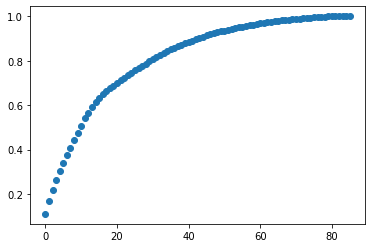

In [134]:
sum_importances = sum_and_plot_importances(variables, importances)

In [135]:
sum_importances

,0,1
0,out_prncp,0.1101721917
1,total_pymnt,0.1705087949
2,funded_amnt,0.2192896584
3,issue_d_2,0.2627097295
4,int_rate,0.3029799907
5,time,0.3383624737
6,revol_util,0.3731771652
7,revol_bal,0.4075694290
8,total_acc,0.4412306545
9,annual_inc,0.4746343183


In [136]:
def keep_vars(features, sum_importances, threshold):
  keep_vars = list(sum_importances[sum_importances.iloc[:, 1] <= threshold].iloc[:, 0])
  features = features.loc[:, keep_vars]
  
  return features

In [137]:
features_c = keep_vars(features, sum_importances, threshold = 0.99)

In [138]:
features_c.shape

(9931, 72)

<center><h2 style="color:red"><b>Modeling </b> </h2> </center>  
Spliting the data set between train, validation and test

In [139]:
# Create the train base with 70% of the data
X_train, X_aux, y_train, y_aux = train_test_split(features_c, outcome, test_size=0.3, random_state=6)

In [140]:
# Create the validation and test with 15% of the data orginal dataset
X_valid, X_test, y_valid, y_test = train_test_split(X_aux, y_aux, test_size=0.5, random_state=6)

In [141]:
print("train:", X_train.shape)
print("validation:", X_valid.shape)
print("test:", X_test.shape)

train: (6951, 72)
validation: (1490, 72)
test: (1490, 72)


# Logistic regression 

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix 
from sklearn import metrics

Confusion Matrix:


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


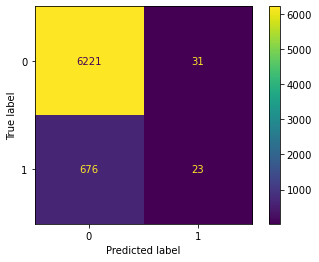

In [184]:
# fitting the model
lrc = LogisticRegression()
lrc.fit(X_train, y_train) 
#Confusion Matrix
print("Confusion Matrix:")
plot_confusion_matrix(lrc, X_train, y_train) 

In [185]:
# Predicted values
pred=lrc.predict(X_train)
# AUC
print("AUC:", roc_auc_score(y_train,pred)) 

AUC: 0.5139728677381178


### Validation

Confusion Matrix:


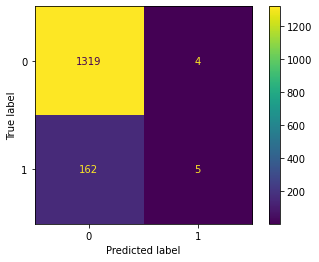

In [186]:
#Confusion Matrix
print("Confusion Matrix:")
plot_confusion_matrix(lrc, X_valid, y_valid) 

In [187]:
# Predicted values
pred=lrc.predict(X_valid)
# AUC
print("AUC:", roc_auc_score(y_valid,pred)) 

AUC: 0.5134583440828093


### Test

Confusion Matrix:


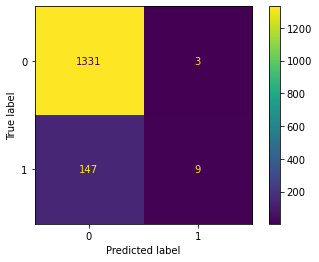

In [188]:
#Confusion Matrix
print("Confusion Matrix:")
plot_confusion_matrix(lrc, X_test, y_test) 

In [189]:
# Predicted values
pred=lrc.predict(X_test)
# AUC
print("AUC:", roc_auc_score(y_test,pred)) 

AUC: 0.5277217160650445


# Regression tree

Confusion Matrix:


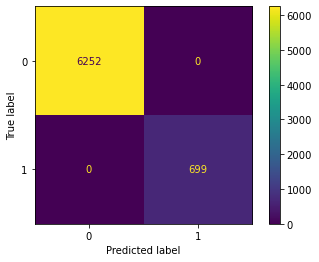

In [216]:
rdt = ExtraTreesClassifier(n_estimators = 100, criterion = 'entropy', verbose = 0)
rdt.fit(X_train, np.array(y_train).ravel())

#Confusion Matrix
print("Confusion Matrix:")
plot_confusion_matrix(rdt, X_train, y_train) 

In [217]:
# Predicted values
pred=rdt.predict(X_train)
# AUC
print("AUC:", roc_auc_score(y_train,pred)) 

AUC: 1.0


overfitting 

### Validation

In [199]:
# Predicted values
pred=rdt.predict(X_valid)
# AUC
print("AUC:", roc_auc_score(y_valid,pred)) 

AUC: 0.5198242969842628


### Test

In [193]:
# Predicted values
pred=rdt.predict(X_test)
# AUC
print("AUC:", roc_auc_score(y_test,pred)) 

AUC: 0.531676469457579


In [194]:
from collections import Counter
print('Y real', Counter(y_train) )
print('Y predicted',Counter(pred)) 

Y real Counter({0: 6252, 1: 699})
Y predicted Counter({0: 1479, 1: 11})


# Gradient Boost

Confusion Matrix:


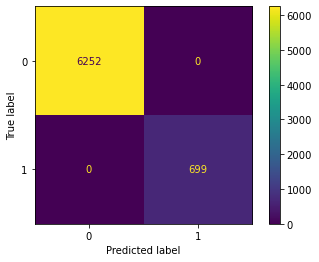

In [195]:
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate= 0.1,random_state = 0)
gbc.fit(X_train, np.array(y_train).ravel())

#Confusion Matrix
print("Confusion Matrix:")
plot_confusion_matrix(rdt, X_train, y_train) 

In [198]:
pred=gbc.predict(X_train)
# Predicted values
pred=gbc.predict(X_train)
# AUC
print("AUC:", roc_auc_score(y_train,pred)) 

AUC: 0.9033535019866603


### Validation

In [201]:
# Predicted values
pred=gbc.predict(X_valid)
# AUC
print("AUC:", roc_auc_score(y_valid,pred)) 

AUC: 0.8791057341100111


### Test 

In [202]:
# Predicted values
pred=gbc.predict(X_test)
# AUC
print("AUC:", roc_auc_score(y_test,pred)) 

AUC: 0.842948717948718


<p style="color:red"><b> New base train data set </b> </p>
The model is having dificulty on separate the good and bad because we have low quantity of bad clients. So we created a paired dataset
 

In [203]:
print('Y real', Counter(y_train) )

Y real Counter({0: 6252, 1: 699})


As our train set has 699 bad clients, we select randonly 699 good clients to train the model. So, we have a train set with 1398 rows

In [204]:
# Select the elements where y_train is igual to 1 
y_train_aux= y_train==1
y_train_A = y_train[y_train_aux]
X_train_A = X_train[y_train_aux]

In [205]:
# Select the elements where y_train is igual to 0
y_train_aux= y_train==0
y_train_z = y_train[y_train_aux]
# sample of 699 
y_train_B=y_train_z.sample(699)

In [206]:
# select the index of y
n=y_train_B.index
# select the new dataset
X_train_B = X_train[X_train.index.isin(n)]

In [207]:
#Concatenate the new the 2 set
X_train_new =  pd.concat([X_train_A, X_train_B])
y_train_new =  pd.concat([y_train_A, y_train_B])

In [208]:
len(X_train_new)

1398

In [209]:
len(y_train_new)

1398

Confusion Matrix:


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


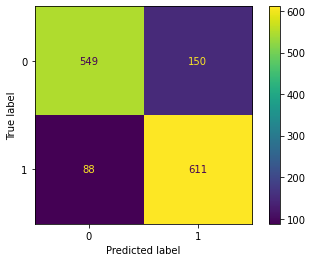

In [210]:
# fitting the model
lrcN = LogisticRegression()
lrcN.fit(X_train_new, y_train_new) 
#Confusion Matrix
print("Confusion Matrix:")
plot_confusion_matrix(lrcN, X_train_new, y_train_new) 

In [211]:
# Predicted values
pred=lrcN.predict(X_train_new)
# AUC
print("AUC:", roc_auc_score(y_train_new,pred)) 

AUC: 0.8297567954220315


### Validation

Confusion Matrix:


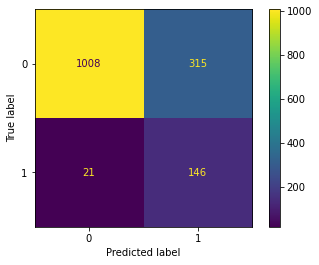

In [212]:
#Confusion Matrix
print("Confusion Matrix:")
plot_confusion_matrix(lrcN, X_valid, y_valid) 

In [213]:
# Predicted values
pred=lrcN.predict(X_valid)
# AUC
print("AUC:", roc_auc_score(y_valid,pred))

AUC: 0.8180781294553748


### Test

Confusion Matrix:


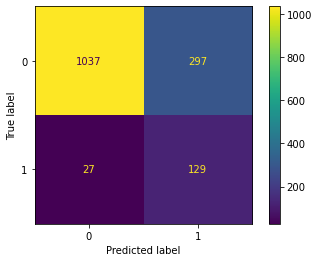

In [214]:
#Confusion Matrix
print("Confusion Matrix:")
plot_confusion_matrix(lrcN, X_test, y_test) 

In [215]:
# Predicted values
pred=lrcN.predict(X_test)
# AUC
print("AUC:", roc_auc_score(y_test,pred)) 

AUC: 0.8021421981317034
